In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix,ConfusionMatrixDisplay ,roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV ,KFold,cross_val_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

## Creating Functions:

In [2]:
def basic_information(df):
    print("Basic Information : \n")
    df.info()
    print("\n\nCorrelation plot : \n")
    plt.figure(figsize=(15,12))
    sns.heatmap(df.corr(), annot=True, cmap="Blues",linecolor='black', linewidths=0.5, fmt='.1g')
    plt.show()
    print("\n\nDescriptive Statistics : \n")
    return df.describe()

In [3]:
def lab_encode(df,column):
    label_encoder = preprocessing.LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    return df

In [4]:
def one_hot_encoder(df,columns):
    ohe=OneHotEncoder(handle_unknown="ignore", sparse=False)
    for i in columns:
        x=pd.DataFrame(ohe.fit_transform(df[[i]]), columns=df[i].unique())
        df = pd.concat([x,df], axis=1, join="inner").drop(i,axis=1)
    return df

In [5]:
from sklearn.preprocessing import MinMaxScaler

def MinMax_scaler(data):
    scaler = MinMaxScaler()
    scaler = scaler.fit(data)
    scaled_data = scaler.transform(data)
    return scaled_data

In [6]:
# function to find the best parameters using GridSearchCV
kernel = []
def grid_search(x_train,y_train):
    param_grid = [{"kernel" : ['linear', 'poly', 'rbf', 'sigmoi'],
               'C':np.geomspace(1e-3, 1e3, 7).tolist(), 'gamma': np.geomspace(1e-2, 1e1, 7).tolist()}]    
    gsv = GridSearchCV(SVC( random_state=42), param_grid, verbose = 300)
    gsv.fit(x_train,y_train)
    print(gsv.best_score_ ,'\n',"\n" , gsv.best_params_)
    var = gsv.best_params_['kernel']
    kernel.append(var)

In [7]:
#function to find value of c with accuarcy
def c(x_train, y_train):
    print(f'Regularization(C) \n\n')
    for i in np.geomspace(1e-3, 1e3, 7 ).tolist():
        model = SVC(C =i, gamma = 0.01 , kernel= kernel[0],random_state=42)
        model.fit(x_train, y_train)
        print(f'Value of C {i} : Train_Accuracy {model.score(x_train, y_train)} : Test_Accuracy {model.score(x_test, y_test)}')

In [8]:
def cm_clreport(y_test,preds):
    cm=confusion_matrix(y_test,preds)
    print(cm)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm,annot=True)
    plt.show()
    print(classification_report(y_test, preds))

In [9]:
def roc_auc(y_test,preds):
    fpr, tpr, thresholds = roc_curve(y_test, preds)

    plt.figure(figsize=(6,4))

    plt.plot(fpr, tpr, linewidth=2)

    plt.plot([0,1], [0,1], 'k--' )

    plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

    plt.xlabel('False Positive Rate (1 - Specificity)')
  
    plt.ylabel('True Positive Rate (Sensitivity)')
    auc = roc_auc_score(y_test, preds)
    print(f'\n\n ROC AUC score: {auc} \n\n')
    plt.show()

In [11]:
df = pd.read_csv("/content/forestfires.csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# Dataset : Forest Fire

## classify the Size_Categorie using SVM

* month	month of the year: 'jan' to 'dec'
* day	day of the week: 'mon' to 'sun'
* FFMC	FFMC index from the FWI system: 18.7 to 96.20
* DMC	DMC index from the FWI system: 1.1 to 291.3
* DC	DC index from the FWI system: 7.9 to 860.6
* ISI	ISI index from the FWI system: 0.0 to 56.10
* temp	temperature in Celsius degrees: 2.2 to 33.30
* RH	relative humidity in %: 15.0 to 100
* wind	wind speed in km/h: 0.40 to 9.40
* rain	outside rain in mm/m2 : 0.0 to 6.4
* Size_Categorie 	the burned area of the forest ( Small , Large)

Basic Information : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    i

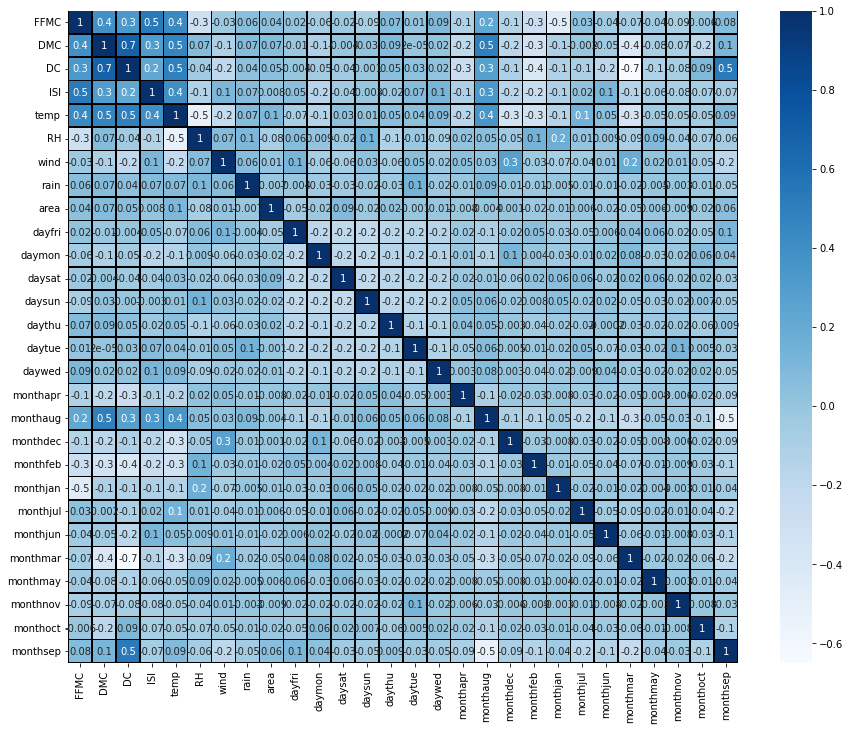



Descriptive Statistics : 



,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
basic_information(df)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [14]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [16]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [17]:
df.agg(["skew","kurt"])

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
skew,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344,12.846934,1.816105,...,7.401340,4.798308,16.031038,3.646828,5.254127,2.594172,16.031038,22.737634,5.628522,0.712255
kurt,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964,194.140721,1.303265,...,52.984784,21.105386,255.984443,11.343218,25.705276,4.748083,255.984443,517.000000,29.795509,-1.498505


In [18]:
for i in df.columns :
    print(i , '\n', df[i].value_counts())

month 
 aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
day 
 sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
FFMC 
 92.1    28
91.6    28
91.0    22
91.7    19
92.4    16
        ..
86.9     1
85.2     1
53.4     1
85.1     1
94.4     1
Name: FFMC, Length: 106, dtype: int64
DMC 
 99.0     10
129.5     9
231.1     8
142.4     8
35.8      7
         ..
138.1     1
109.2     1
91.6      1
122.3     1
146.0     1
Name: DMC, Length: 215, dtype: int64
DC 
 745.3    10
692.6     9
692.3     8
715.1     8
698.6     8
         ..
565.5     1
503.6     1
589.9     1
85.3      1
106.7     1
Name: DC, Length: 219, dtype: int64
ISI 
 9.6     23
7.1     21
6.3     20
8.4     17
7.0     17
        ..
16.5     1
2.2      1
8.3      1
2.0      1
1.1      1
Name: ISI, Length: 119, dtype: int64
temp 
 17.4    8
19.6    8
15.4    7
20.6    7
20.4    6

In [19]:
for i in df.columns:
    print(i , "\n" , df[i].unique())

month 
 ['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
day 
 ['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']
FFMC 
 [86.2 90.6 91.7 89.3 92.3 91.5 91.  92.5 92.8 63.5 90.9 92.9 93.3 84.9
 89.2 86.3 91.8 94.3 90.2 93.5 91.4 92.4 93.4 88.6 90.3 90.  88.1 79.5
 94.8 90.1 94.2 87.2 87.6 92.1 92.6 84.  86.6 93.  91.1 91.2 88.8 84.2
 89.7 83.9 69.  82.1 85.9 84.4 68.2 93.7 85.8 95.5 95.2 96.  85.6 81.5
 86.8 93.9 90.8 90.7 88.3 92.2 81.9 88.  83.  93.1 91.9 91.6 87.5 93.6
 84.6 85.4 84.7 86.9 85.2 90.4 53.4 85.1 89.6 50.4 88.2 92.  18.7 90.5
 84.1 85.  87.9 94.6 87.1 92.7 88.9 89.4 94.  75.1 91.3 93.2 94.9 95.
 95.1 95.8 95.9 96.2 96.1 94.5 81.6 94.4]
DMC 
 [ 26.2  35.4  43.7  33.3  51.3  85.3  88.9 145.4 129.5  88.   73.2  70.8
 126.5 133.3 141.2  35.8  32.8  27.9  27.4  78.5  96.3 110.9 139.4 142.4
 117.9 149.3  85.1  91.8  69.7  75.6  80.7  41.5  25.7  60.6  96.9 108.3
  82.9  62.3  23.9  52.2 137.   99.6 111.2 114.3  46.5   9.3  13.2  75.3
 103.2  48.3 147.3   6.8 

In [20]:
# find categorical and numeric variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in df.columns if df[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 3 categorical variables

The categorical variables are :
 ['month', 'day', 'size_category']


There are 28 Numeric variables

The Numeric variables are :
 ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']


<Figure size 432x288 with 0 Axes>

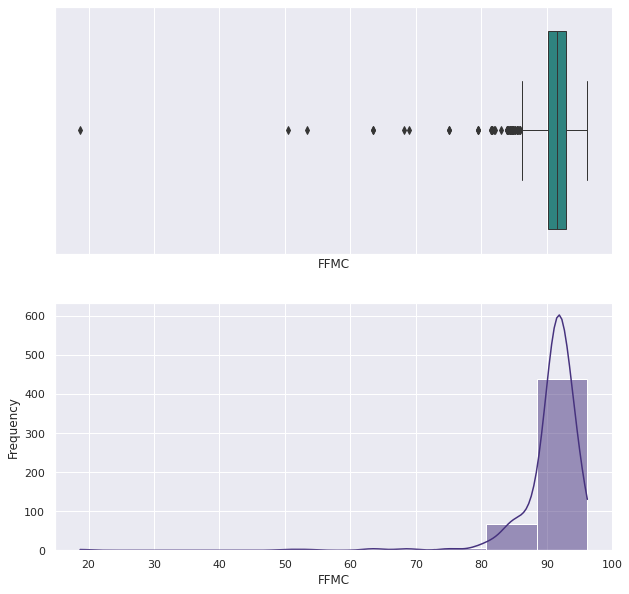

<Figure size 720x720 with 0 Axes>

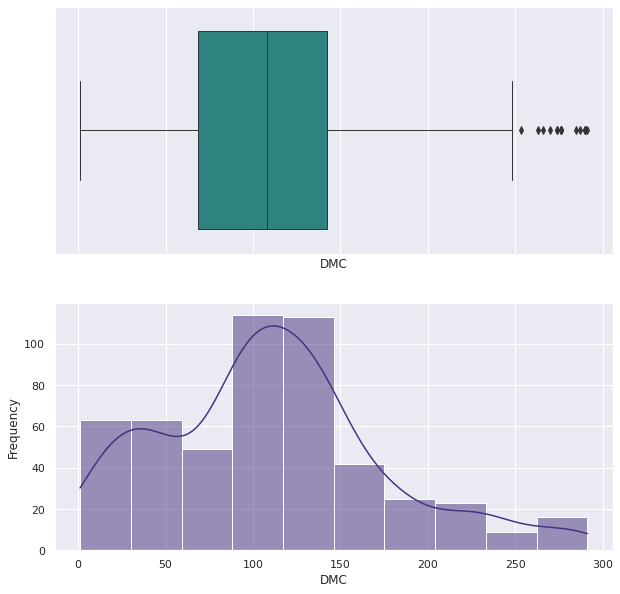

<Figure size 720x720 with 0 Axes>

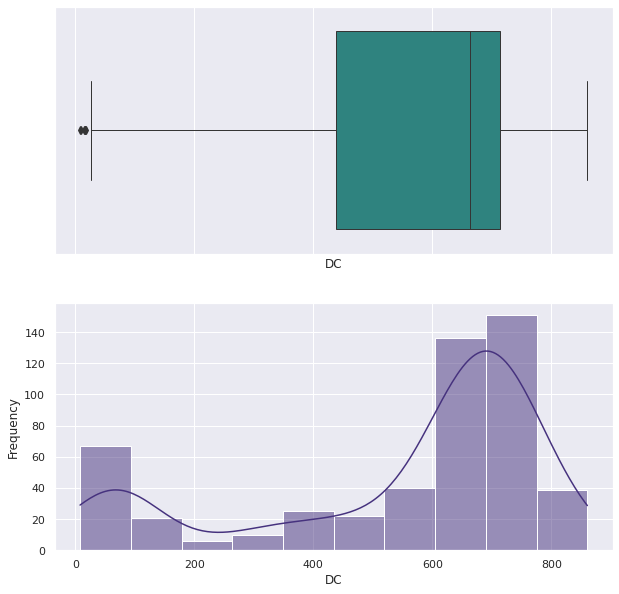

<Figure size 720x720 with 0 Axes>

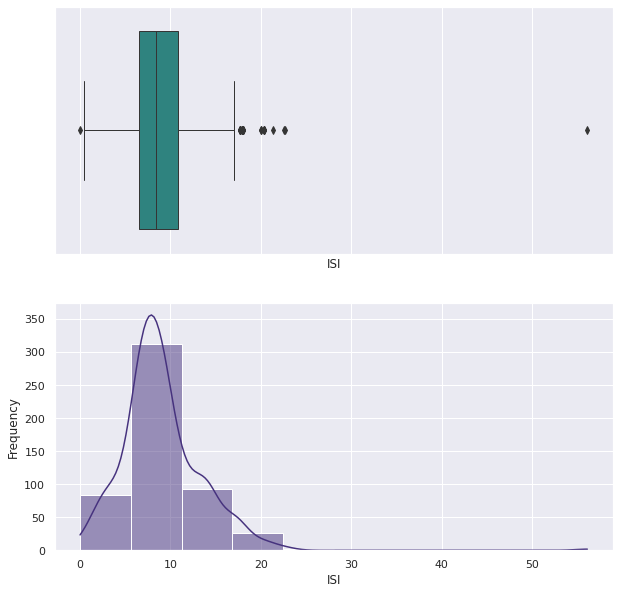

<Figure size 720x720 with 0 Axes>

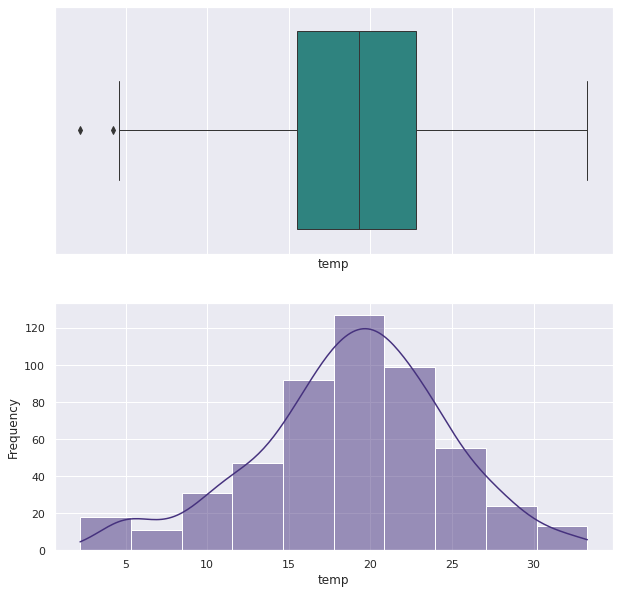

<Figure size 720x720 with 0 Axes>

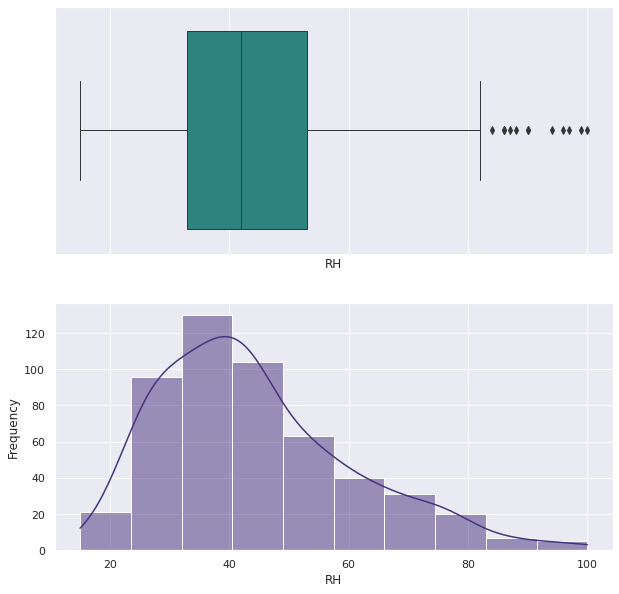

<Figure size 720x720 with 0 Axes>

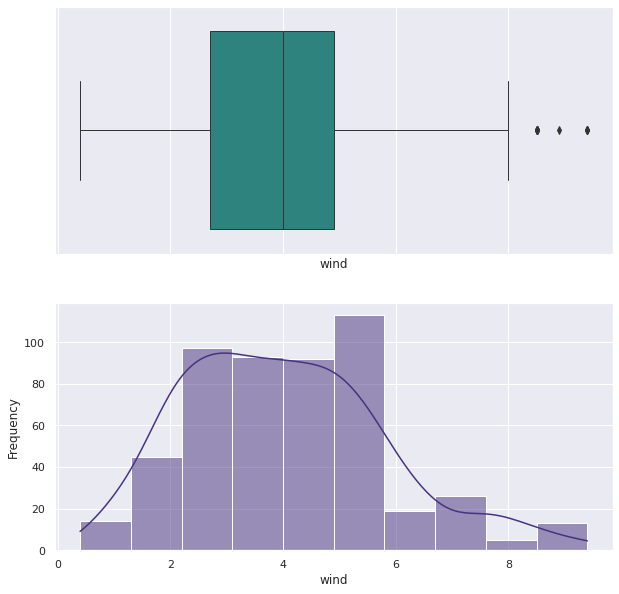

<Figure size 720x720 with 0 Axes>

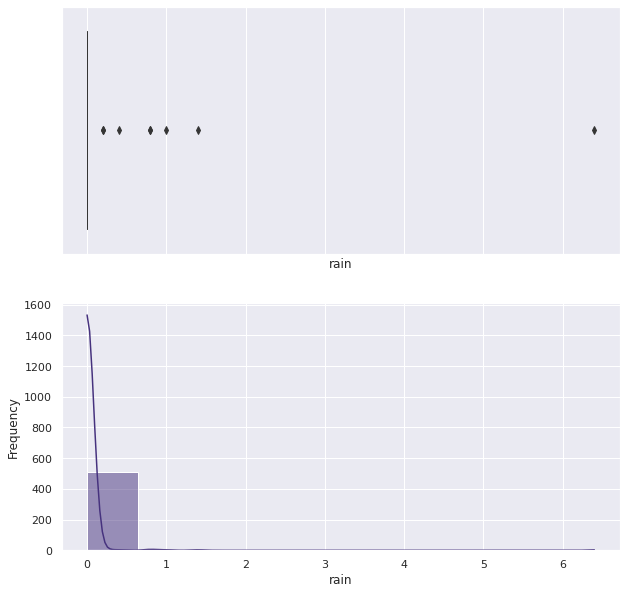

<Figure size 720x720 with 0 Axes>

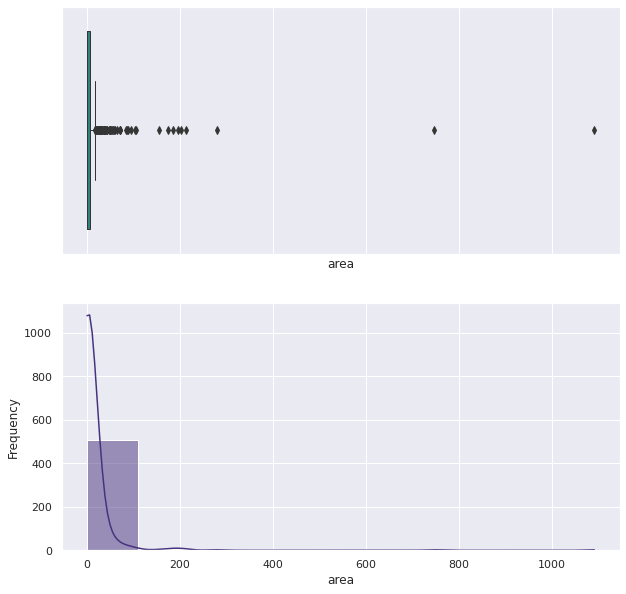

<Figure size 720x720 with 0 Axes>

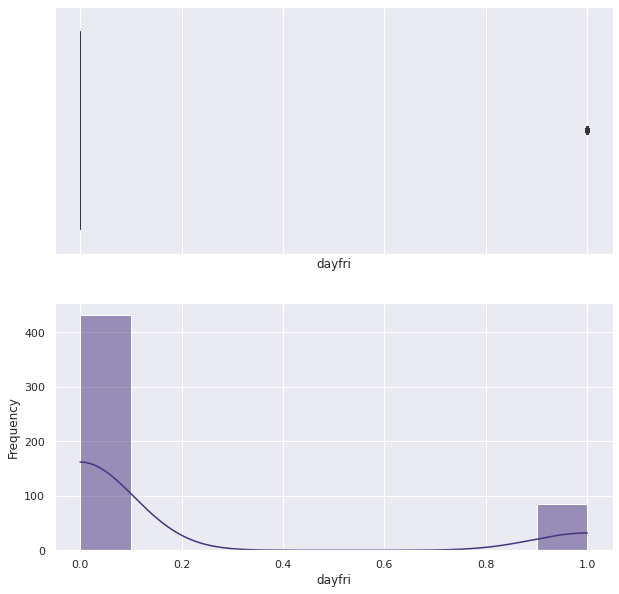

<Figure size 720x720 with 0 Axes>

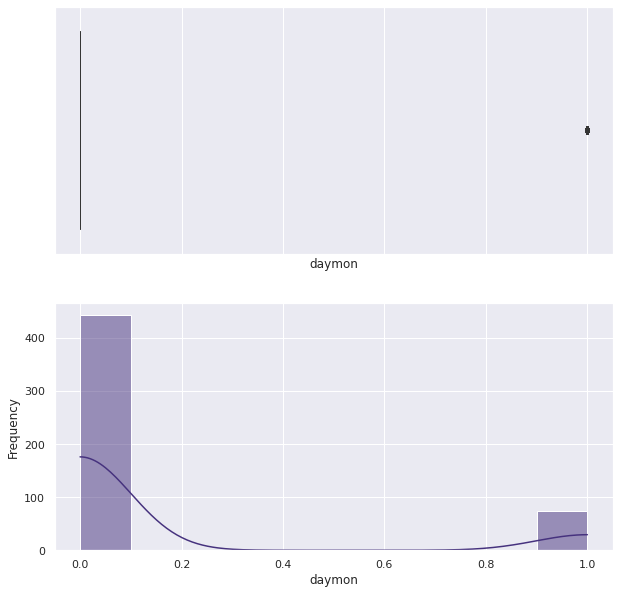

<Figure size 720x720 with 0 Axes>

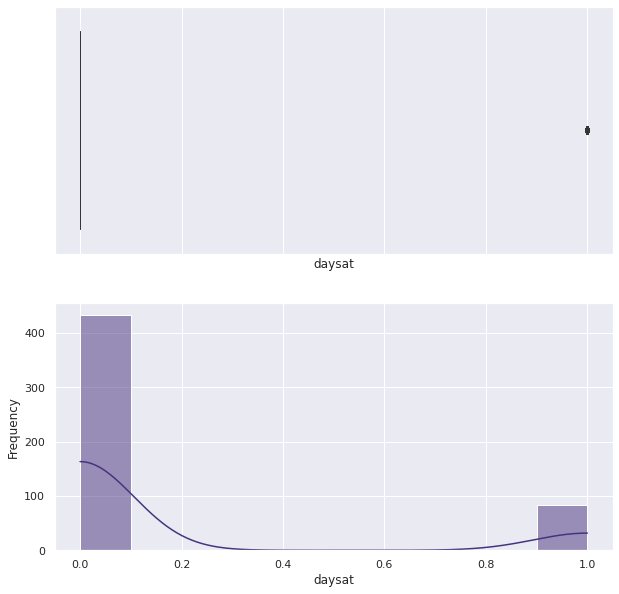

<Figure size 720x720 with 0 Axes>

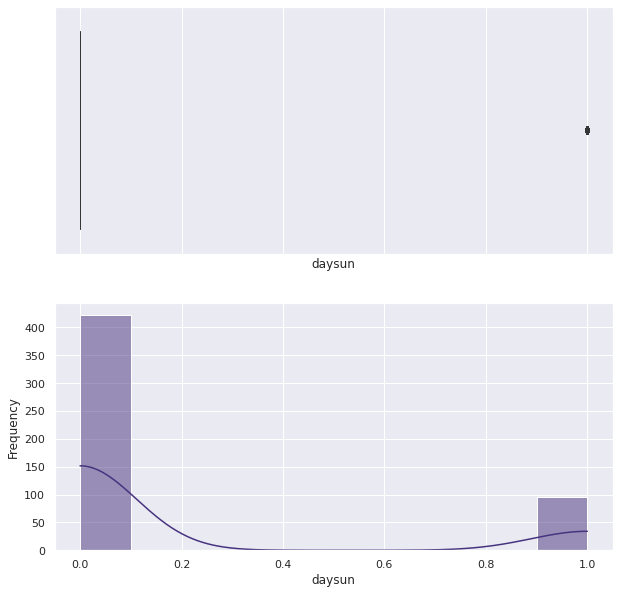

<Figure size 720x720 with 0 Axes>

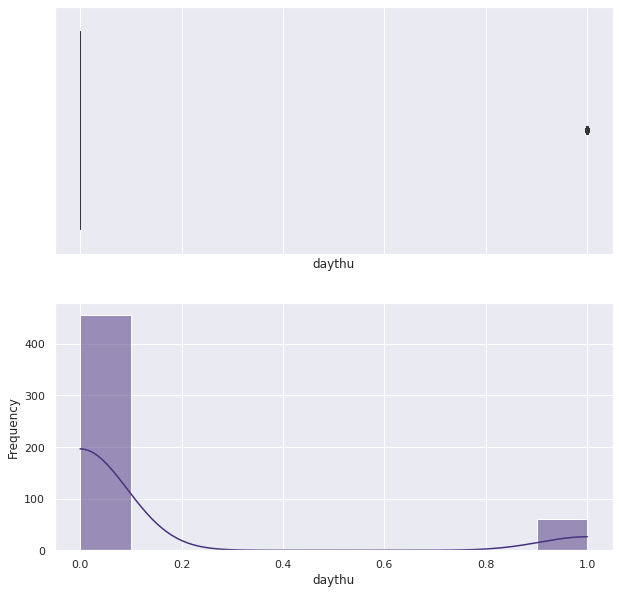

<Figure size 720x720 with 0 Axes>

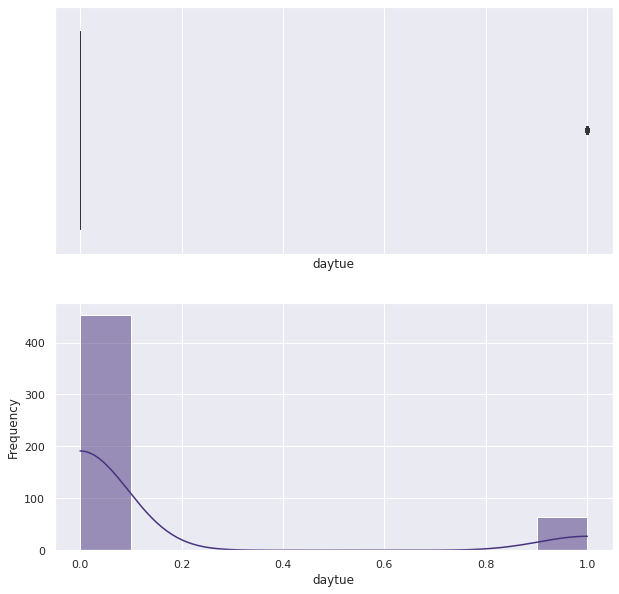

<Figure size 720x720 with 0 Axes>

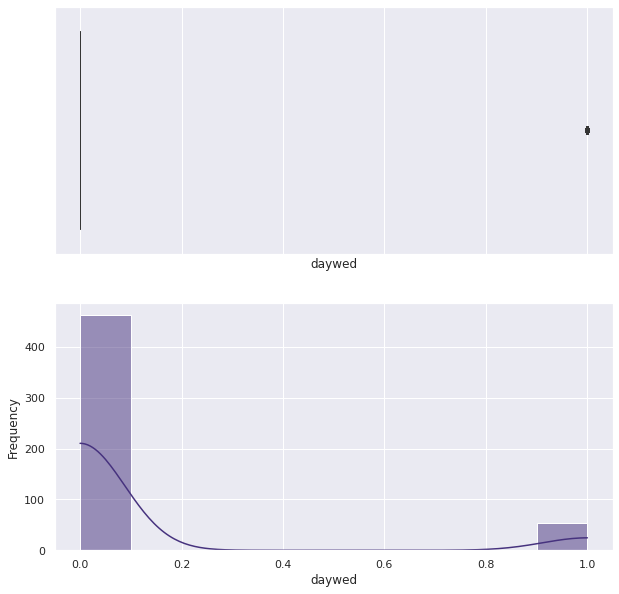

<Figure size 720x720 with 0 Axes>

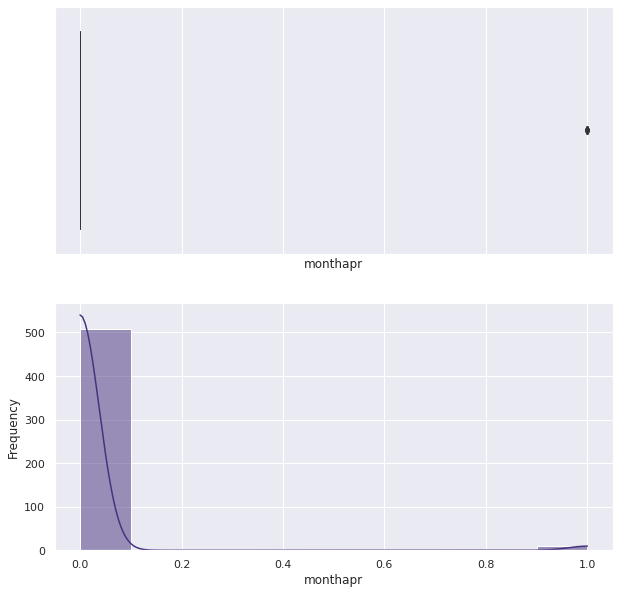

<Figure size 720x720 with 0 Axes>

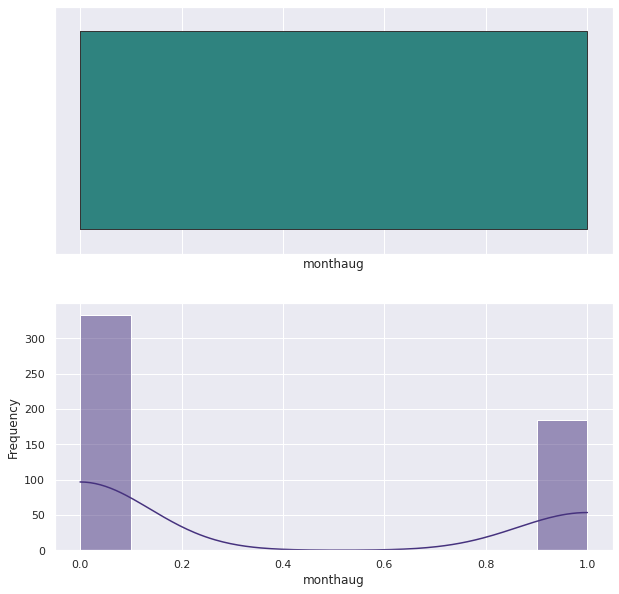

<Figure size 720x720 with 0 Axes>

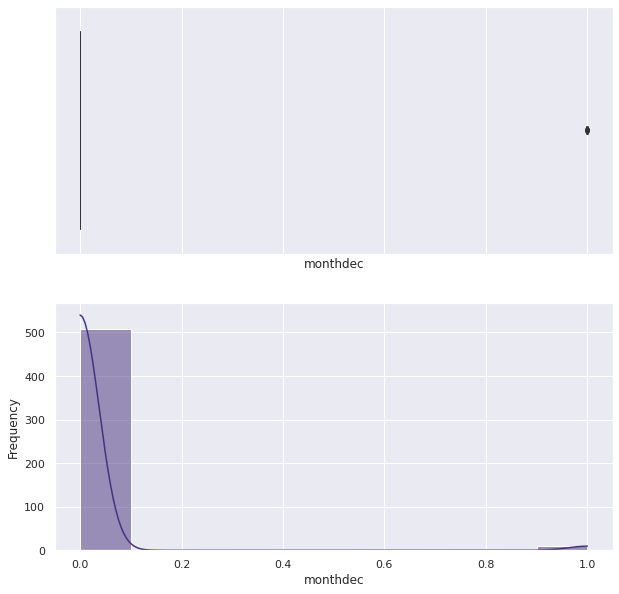

<Figure size 720x720 with 0 Axes>

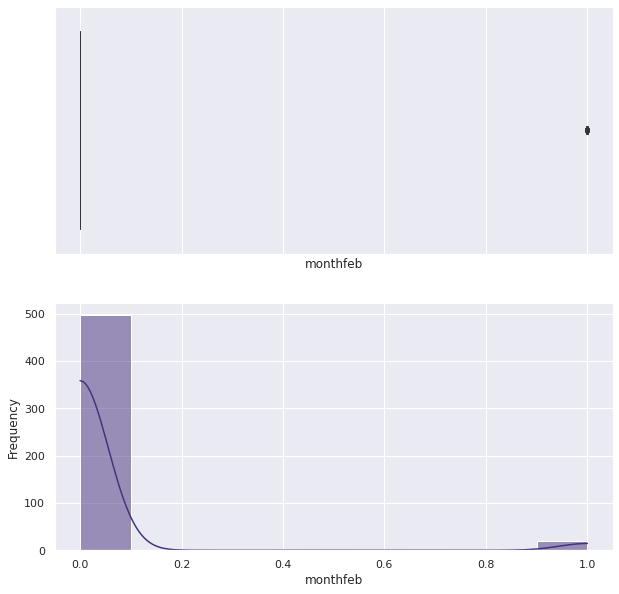

<Figure size 720x720 with 0 Axes>

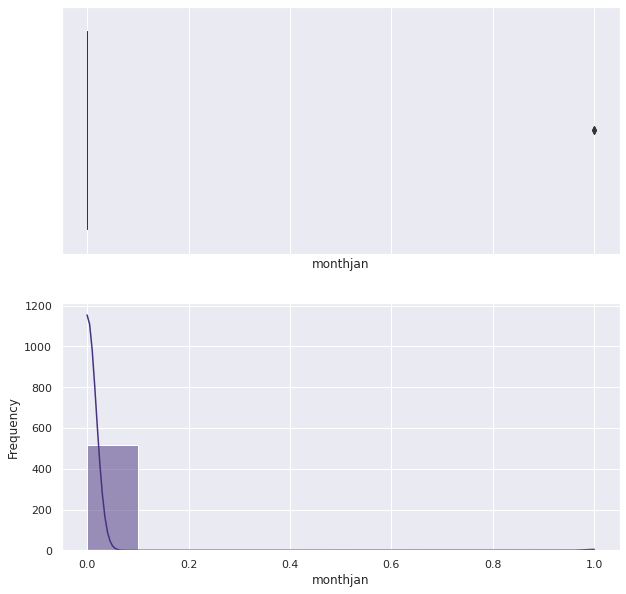

<Figure size 720x720 with 0 Axes>

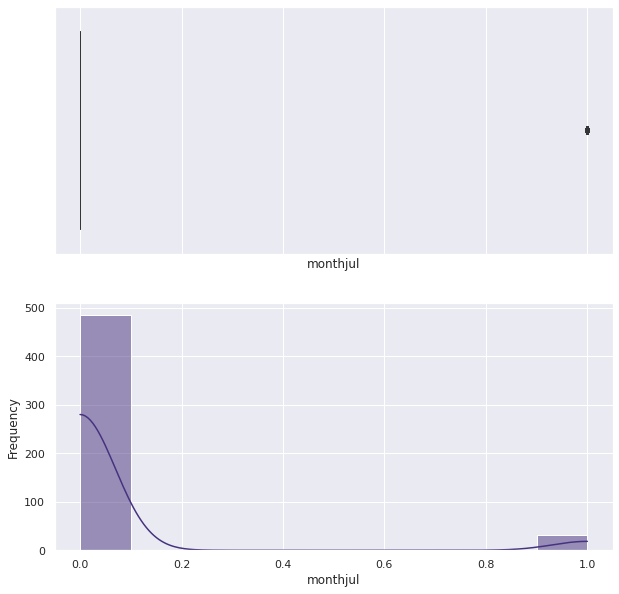

<Figure size 720x720 with 0 Axes>

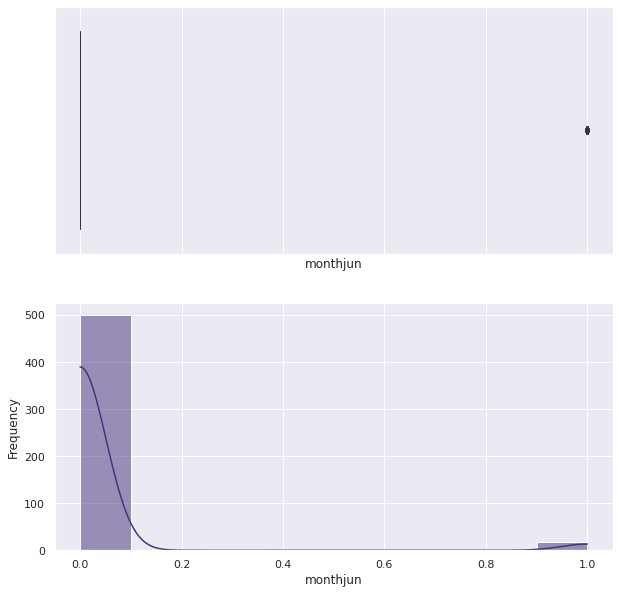

<Figure size 720x720 with 0 Axes>

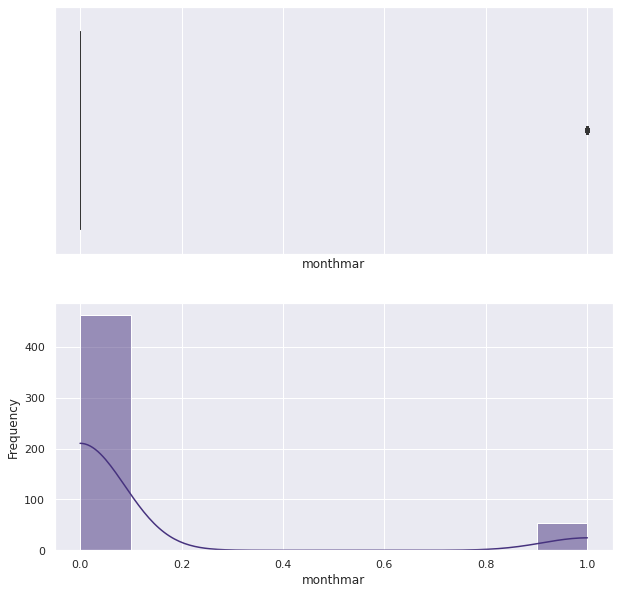

<Figure size 720x720 with 0 Axes>

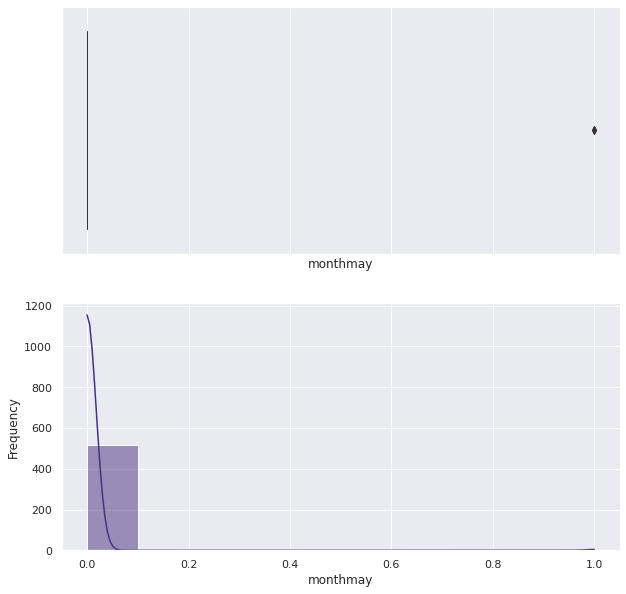

<Figure size 720x720 with 0 Axes>

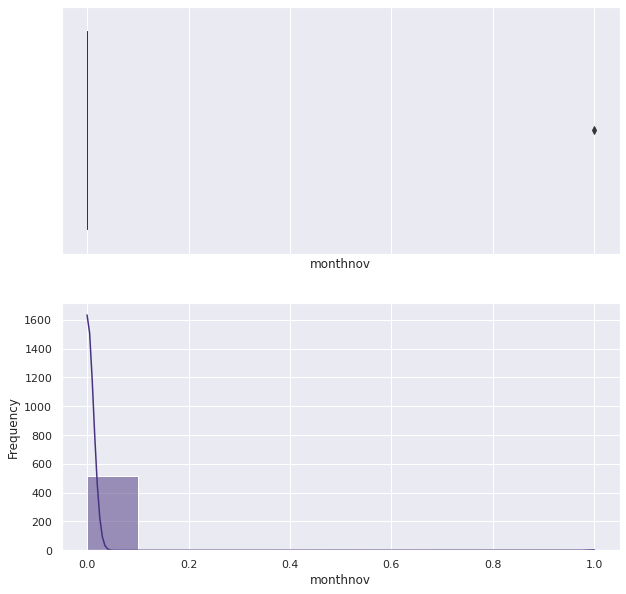

<Figure size 720x720 with 0 Axes>

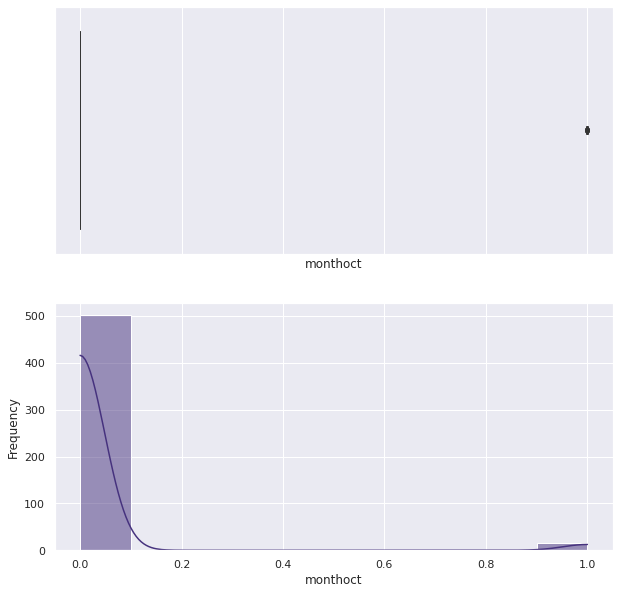

<Figure size 720x720 with 0 Axes>

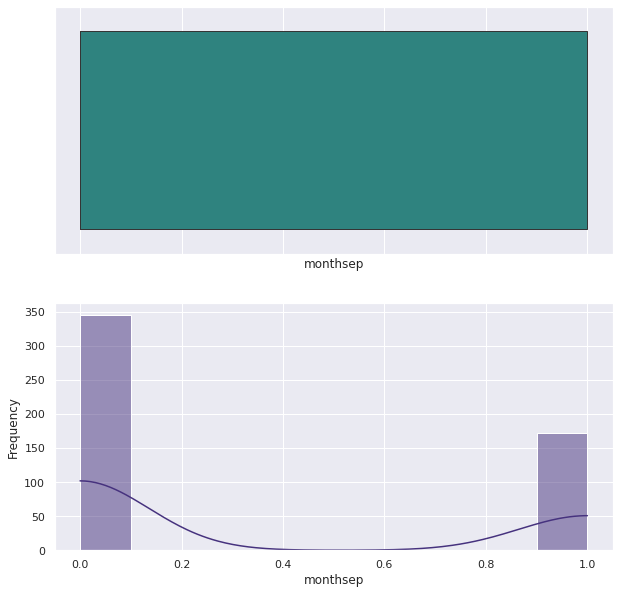

In [21]:
for i in numeric:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 10)}, palette="viridis")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0, palette="viridis")
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True, palette="viridis")

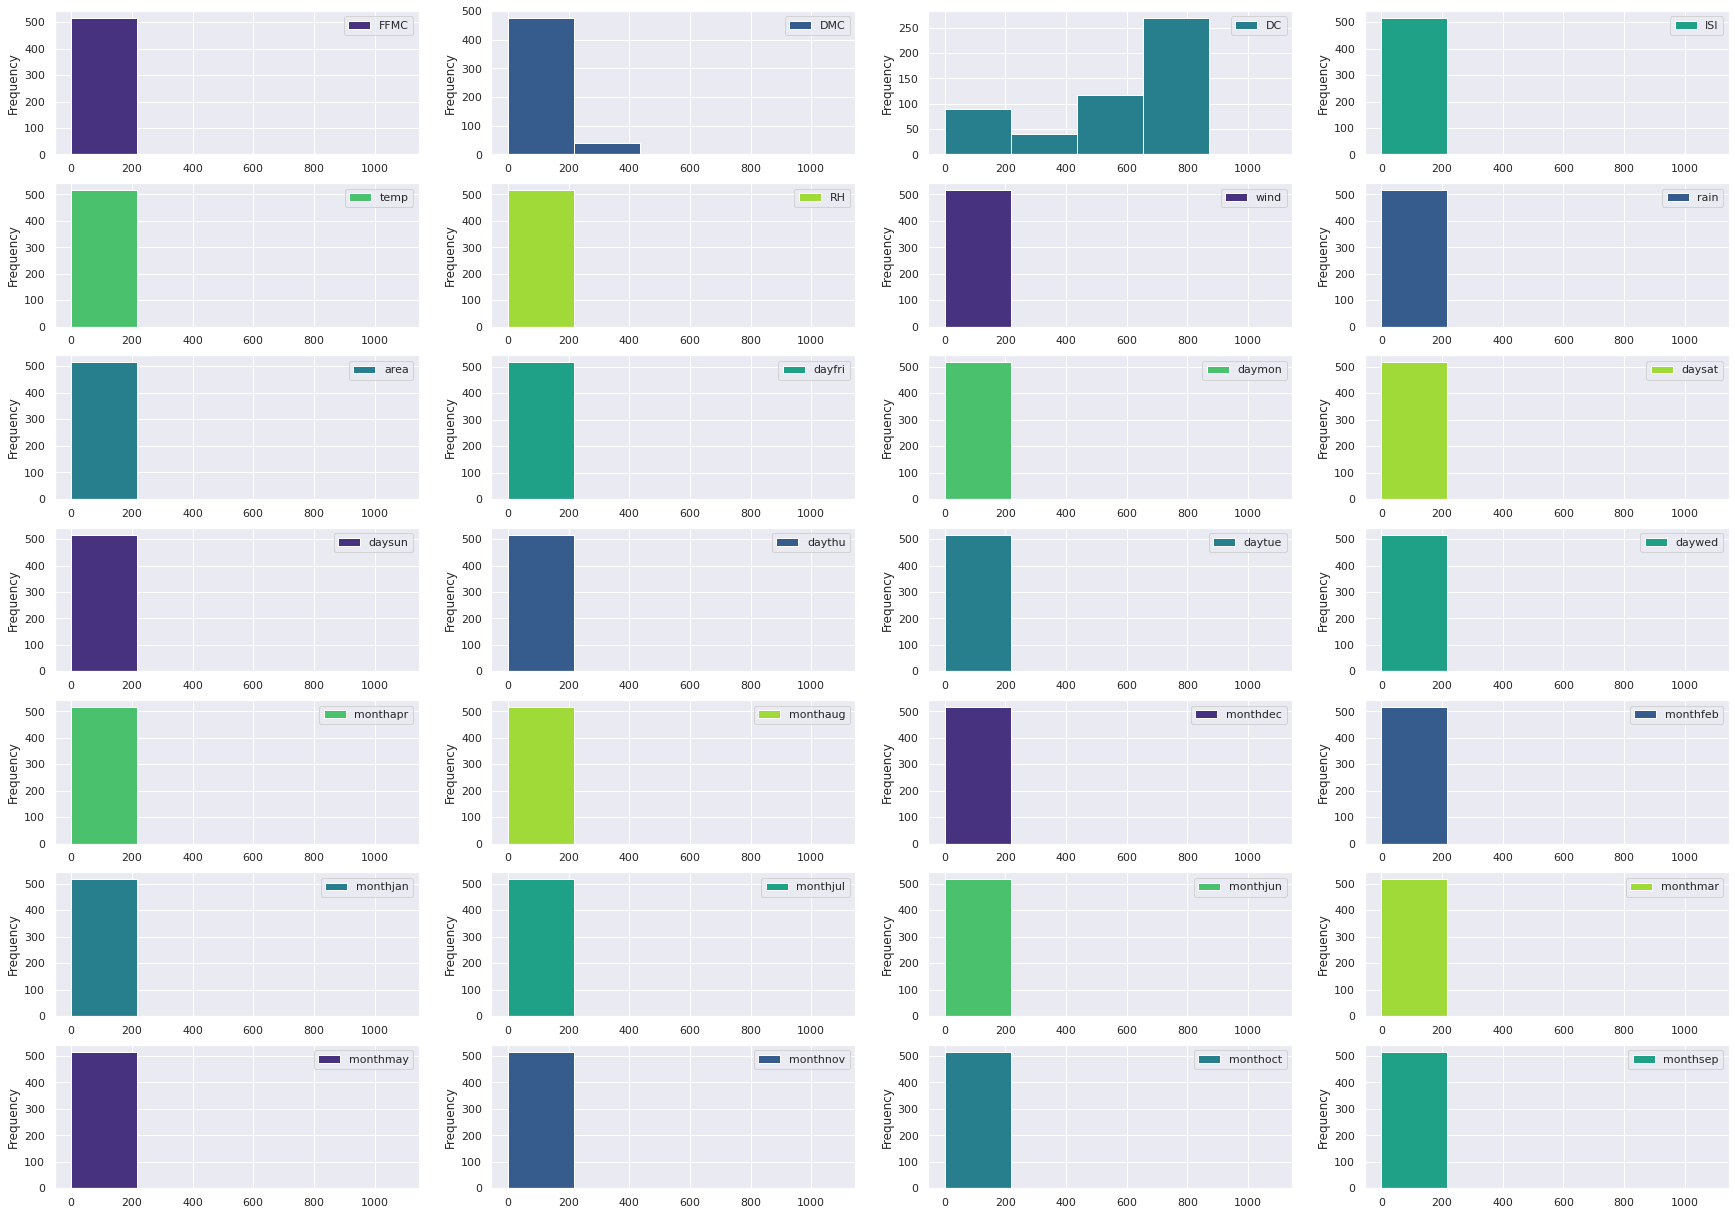

In [24]:
plt.rcParams['figure.figsize']=(30,28)

df.plot(kind='hist', bins=5, subplots=True, layout=(9,4), sharex=False, sharey=False)

plt.show()

### Applying encoding for catogorical Data

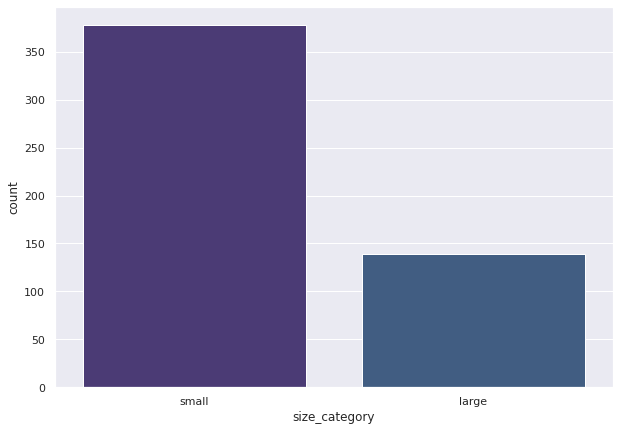

In [26]:
plt.figure(figsize=(10,7))
sns.countplot(df["size_category"])
plt.show()

In [27]:
#encoding y variable
df = lab_encode(df,"size_category")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


Skew: -1.0457009299050588
Kurtosis: -0.9100450696071154


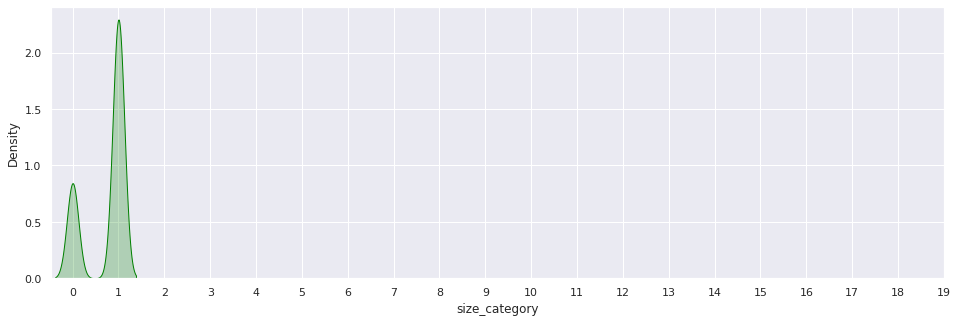

In [28]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['size_category'].skew()))
print("Kurtosis: {}".format(df['size_category'].kurtosis()))
ax = sns.kdeplot(df['size_category'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

In [29]:
# df["month"].replace({'mar' : 3 , 'oct' :10 , 'aug' :8, 'sep' :9, 'apr' :4, 'jun' :6, 'jul' :7, 'feb' :2, 'jan' :1,'dec' :12, 'may' :5, 'nov' :11}, inplace=True)
# df['day'].replace({'sun':7, 'mon':1,'tue':2,'wed':3, 'thu':4,'fri':5, 'sat':6}, inplace=True)

### Feature Scalling:

In [30]:
from sklearn.preprocessing import MinMaxScaler
data= df.drop(columns = ['month','day'])
data
# MinMax_scaler(data)
# scaled_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
scaled_data =MinMax_scaler(data)
scaled_data

array([[0.87096774, 0.08649207, 0.1013252 , ..., 0.        , 0.        ,
        1.        ],
       [0.92774194, 0.11819435, 0.77541926, ..., 1.        , 0.        ,
        1.        ],
       [0.92774194, 0.14679531, 0.79629412, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.8116129 , 0.19159201, 0.77131465, ..., 0.        , 0.        ,
        0.        ],
       [0.97677419, 0.49931082, 0.71162191, ..., 0.        , 0.        ,
        1.        ],
       [0.78451613, 0.00654721, 0.11586725, ..., 0.        , 0.        ,
        1.        ]])

In [32]:
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
scaled_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
x = scaled_data.drop('size_category',axis=1)
y = scaled_data['size_category']
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
scaled_data['size_category'].value_counts()

1.0    378
0.0    139
Name: size_category, dtype: int64

* **Here the data is imbalanced ,so for balancing here we use SMOTE to resample the data.**

In [35]:
import imblearn
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(random_state=42)
X_res, y_res = over_sampler.fit_resample(x, y)

In [36]:
X_res.shape, y_res.shape

((756, 28), (756,))

### Data Visualization of all x variable with respect to y variable

Visualiztion using TSNE



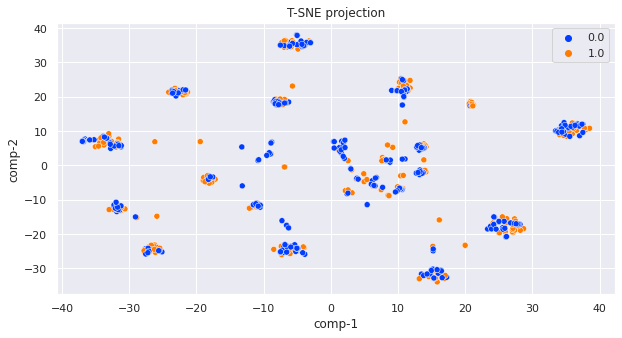

In [37]:
import sklearn
from sklearn.manifold import TSNE

print("Visualiztion using TSNE\n")
tsne = TSNE(n_components=2,random_state=123)
z = tsne.fit_transform(X_res)
df = pd.DataFrame()
df["y"] = y_res
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
    
plt.figure(figsize=(10,5))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                 palette=sns.color_palette("bright", 2),
                data=df).set(title="T-SNE projection") 
plt.show()

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(529, 28)
(227, 28)
(529,)
(227,)


In [40]:
pd.Series(y_test).value_counts()

1.0    121
0.0    106
Name: size_category, dtype: int64

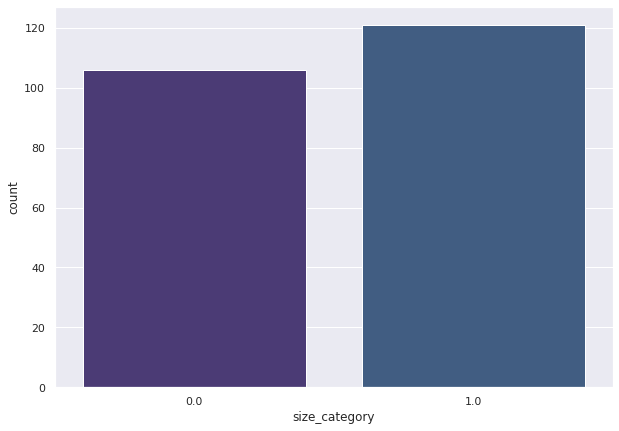

In [41]:
plt.figure(figsize=(10,7))
sns.countplot(y_test)
plt.show()

## Tuning Hyperparameters:

* Kernel: The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.


* Regularization: Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.


* Gamma: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.

## Using Gridsearchcv to find best parameter:

In [42]:
grid_search(x_train,y_train)

Fitting 5 folds for each of 196 candidates, totalling 980 fits
[CV 1/5; 1/196] START C=0.001, gamma=0.01, kernel=linear........................
[CV 1/5; 1/196] END C=0.001, gamma=0.01, kernel=linear;, score=0.519 total time=   0.0s
[CV 2/5; 1/196] START C=0.001, gamma=0.01, kernel=linear........................
[CV 2/5; 1/196] END C=0.001, gamma=0.01, kernel=linear;, score=0.519 total time=   0.0s
[CV 3/5; 1/196] START C=0.001, gamma=0.01, kernel=linear........................
[CV 3/5; 1/196] END C=0.001, gamma=0.01, kernel=linear;, score=0.509 total time=   0.0s
[CV 4/5; 1/196] START C=0.001, gamma=0.01, kernel=linear........................
[CV 4/5; 1/196] END C=0.001, gamma=0.01, kernel=linear;, score=0.509 total time=   0.0s
[CV 5/5; 1/196] START C=0.001, gamma=0.01, kernel=linear........................
[CV 5/5; 1/196] END C=0.001, gamma=0.01, kernel=linear;, score=0.514 total time=   0.1s
[CV 1/5; 2/196] START C=0.001, gamma=0.01, kernel=poly..........................
[CV 1/5; 2/

In [43]:
kernel

['linear']

###  Visualizing C value with respect to traing and testing accuracy:

In [44]:
c(x_train, y_train)

Regularization(C) 


Value of C 0.001 : Train_Accuracy 0.5141776937618148 : Test_Accuracy 0.4669603524229075
Value of C 0.01 : Train_Accuracy 0.5141776937618148 : Test_Accuracy 0.4669603524229075
Value of C 0.1 : Train_Accuracy 0.6049149338374291 : Test_Accuracy 0.5462555066079295
Value of C 1.0 : Train_Accuracy 0.6370510396975425 : Test_Accuracy 0.5682819383259912
Value of C 10.0 : Train_Accuracy 0.7655954631379962 : Test_Accuracy 0.7092511013215859
Value of C 100.0 : Train_Accuracy 0.9054820415879017 : Test_Accuracy 0.8590308370044053
Value of C 1000.0 : Train_Accuracy 0.9867674858223062 : Test_Accuracy 0.9515418502202643


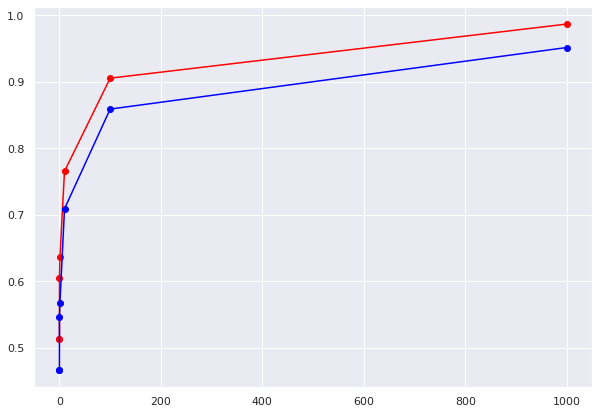

In [45]:
# creating empty list variable 
acc = []

# storing the accuracy values

for i in np.geomspace(1e-3, 1e3, 7 ).tolist():
        model = SVC(C =i, kernel= kernel[0],random_state=42)
        model.fit(x_train, y_train)
        train_acc = np.mean(model.predict(x_train) == y_train)
        test_acc = np.mean(model.predict(x_test) == y_test)
        acc.append([train_acc, test_acc])


# train accuracy plot 
plt.figure(figsize=(10,7))
plt.plot(np.geomspace(1e-3, 1e3, 7 ).tolist(),[i[0] for i in acc],"ro-")

# test accuracy plot
plt.plot(np.geomspace(1e-3, 1e3, 7 ).tolist(),[i[1] for i in acc],"bo-")

* **from above visualiztion we come up with the conclusion that the regularization(c) = 1000 gives us a best accuracy score with linear model.**

## Model building:

* C= which defines the regularization of the error.
* kernel= which defines what type of function is used to transform the dataset
* gamma= defines how loosely the model will fit the training data, allowing you to prevent overfitting

In [46]:
model = SVC(C =1000, kernel= kernel[0], gamma = 0.01,random_state=42)
model.fit(x_train,y_train)

SVC(C=1000, gamma=0.01, kernel='linear', random_state=42)

In [47]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1.0    128
0.0     99
dtype: int64

In [48]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 0.9868
Test set score: 0.9515


In [49]:
# print the scores between dependent test and predicted value

print("Accuracy_score", accuracy_score(y_test,preds)*100)

Accuracy_score 95.15418502202643


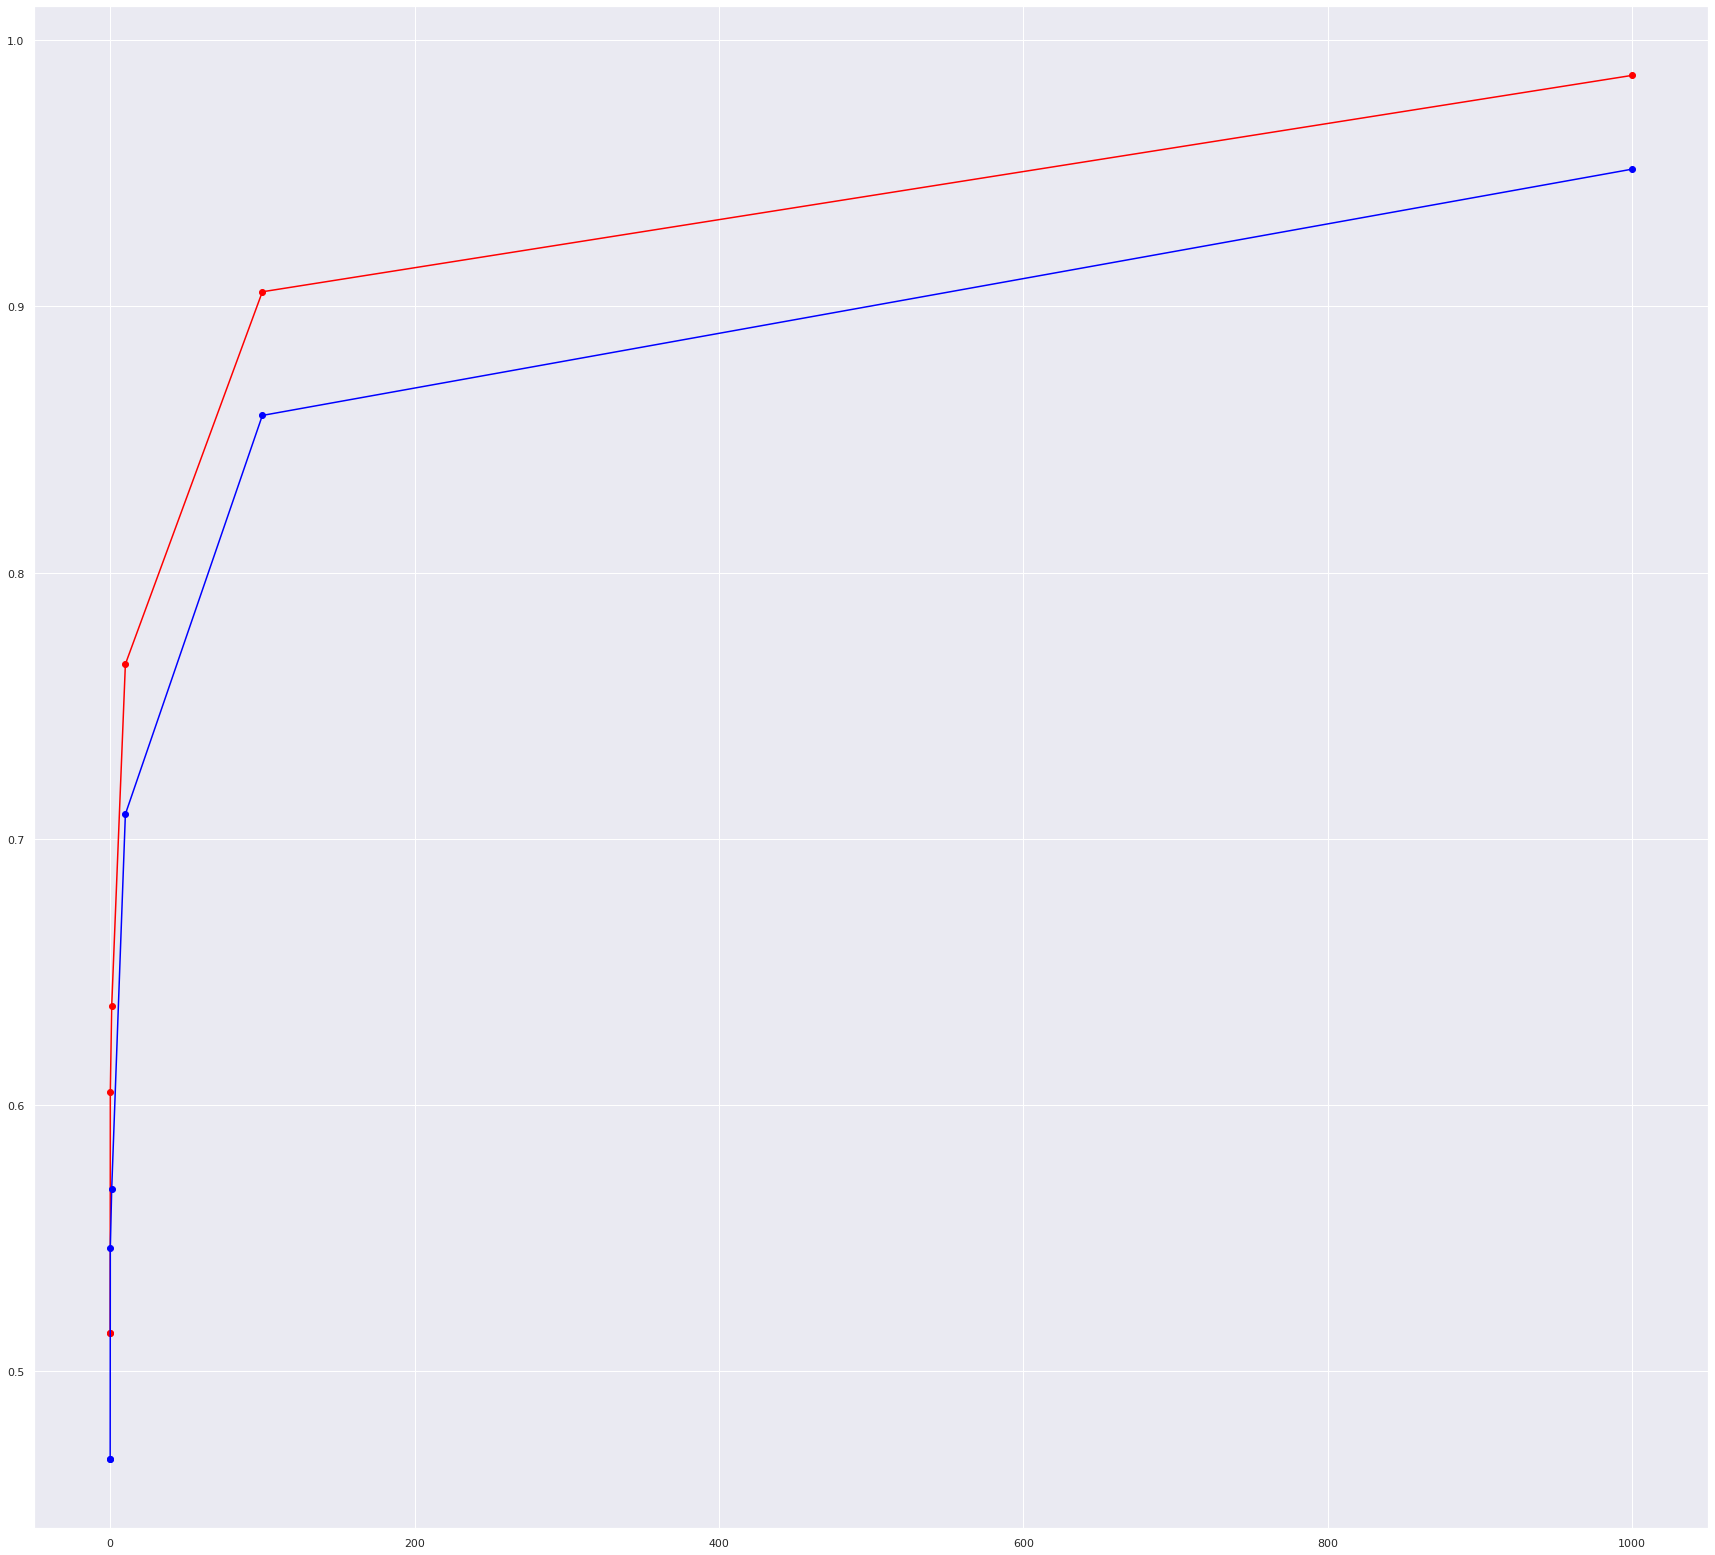

In [50]:
# creating empty list variable 
acc = []

# storing the accuracy values

for i in np.geomspace(1e-3, 1e3, 7 ).tolist():
        model = SVC(C =i, kernel= kernel[0],random_state=42)
        model.fit(x_train, y_train)
        train_acc = np.mean(model.predict(x_train) == y_train)
        test_acc = np.mean(model.predict(x_test) == y_test)
        acc.append([train_acc, test_acc])


# train accuracy plot 
plt.plot(np.geomspace(1e-3, 1e3, 7 ).tolist(),[i[0] for i in acc],"ro-")

# test accuracy plot
plt.plot(np.geomspace(1e-3, 1e3, 7 ).tolist(),[i[1] for i in acc],"bo-")

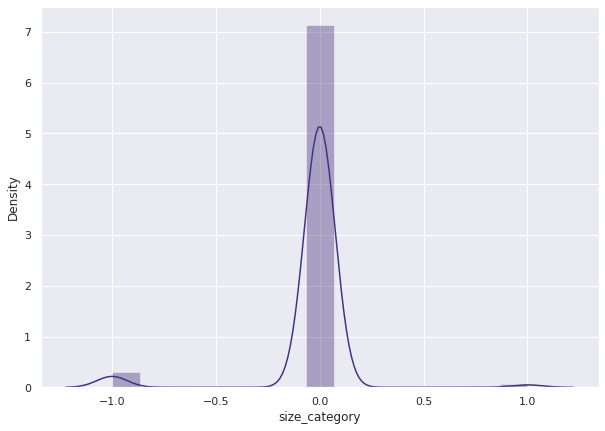

In [51]:
# checking difference between labled y and predicted y
plt.figure(figsize=(10,7))
sns.distplot(y_test-preds)
plt.show()

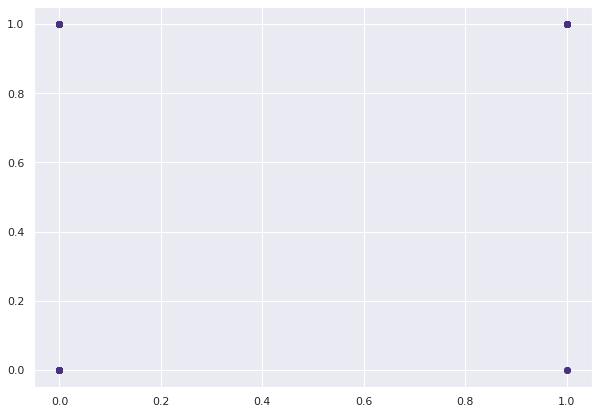

In [52]:
plt.figure(figsize=(10,7))
plt.scatter(y_test,preds)
plt.show()

In [53]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':preds})
df.head(5)

,Actual,Predicted
408,0.0,0.0
97,1.0,1.0
424,1.0,0.0
584,0.0,0.0
603,0.0,0.0


[[ 97   9]
 [  2 119]]


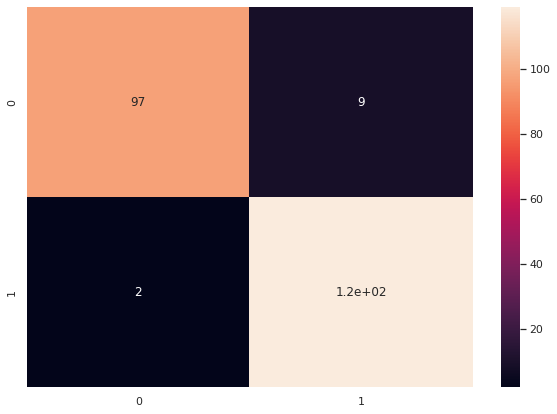

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95       106
         1.0       0.93      0.98      0.96       121

    accuracy                           0.95       227
   macro avg       0.95      0.95      0.95       227
weighted avg       0.95      0.95      0.95       227



In [54]:
cm_clreport(y_test,preds)



 ROC AUC score: 0.9492827070014035 




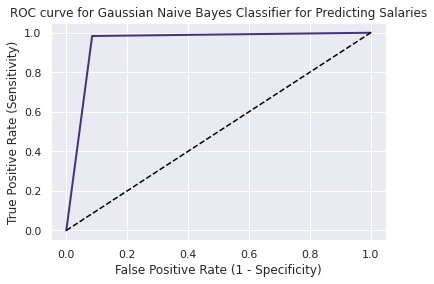

In [55]:
roc_auc(y_test,preds)